Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a DataFrame. DataFrames are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data.


As we saw, NumPy’s ndarray data structure provides essential features for the type of clean, well-organized data typically seen in numerical computing tasks. While it serves this purpose very well, its limitations become clear when we need more flexibility (attaching labels to data, working with missing data, etc.).

Pandas, and in particular its **Series** and **DataFrame** objects, builds on the NumPy array structure and provides efficient access to these sorts of “data munging” tasks that occupy much of a data scientist’s time.

In [255]:
import numpy as np
import pandas as pd

# Introducing pandas object

Pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with **labels** rather than simple integer indices.

Let’s introduce these three fundamental Pandas data structures: the **Series**, **DataFrame**, and **Index**.

## The pandas Series object
A Pandas Series is a one-dimensional array of indexed data. It can be created from a
list or array as follows:


In [256]:
data = pd.Series([0.25, 0.5, 0.75, 1])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

The Series wraps both a sequence of values and a
sequence of indices, which we can access with the **values** and **index** attributes. The
values are simply a familiar NumPy array:

In [257]:
print(data.values, type(data.values))

[0.25 0.5  0.75 1.  ] <class 'numpy.ndarray'>


In [258]:
print(data.index, type(data.index))

RangeIndex(start=0, stop=4, step=1) <class 'pandas.core.indexes.range.RangeIndex'>


The index is an array-like object of type **pd.Index**, which we’ll discuss in more detail
momentarily:

### Series as generalised NumPy array

From what we’ve seen so far, it may look like the Series object is basically interchangeable with a one-dimensional NumPy array.

The essential difference is the presence of the index: while the NumPy array has an **implicitly defined integer index** used to access the values, the Pandas Series has an **explicitly defined index** associated with
the values.

This explicit index definition gives the Series object additional capabilities. For
example, the index **need not be an integer**, but can consist of values of any desired
type. For example, if we wish, we can use strings as an index:


In [259]:
data = pd.Series([0.25, 0.5, 0.75, 1], index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [260]:
data['b']

0.5

### Series as specialised dictionary

Just as the type-specific compiled code behind a NumPy array
makes it more efficient than a Python list for certain operations, the type information
of a Pandas Series makes it much more efficient than Python dictionaries for certain
operations.


In [261]:
population_dict = {
    'California': 38332521,
    'Texas': 26448193,
    'New York': 19651127,
    'Florida': 19552860,
    'Illinois': 12882135
}
population = pd.Series(population_dict).sort_index()
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

Unlike a dictionary, though, the Series also supports array-style operations such as
slicing:

In [262]:
population['California':'Illinois']

California    38332521
Florida       19552860
Illinois      12882135
dtype: int64

### Constructing Series objects
**pd.Series(data, index=index)**

1. Data can be a list of **NumPy array**

In [263]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

Data can be a scalar, which is repeated to fill the specified index:

In [264]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

2. Data can be a **dictionary**

In [265]:
pd.Series({ 2: 'a', 1: 'b', 3: 'c' }).sort_index()

1    b
2    a
3    c
dtype: object

The index can be explicitly set if a different result is preferred:

In [266]:
pd.Series({ 2: 'a', 1: 'b', 3: 'c' }, index=[3, 2])

3    c
2    a
dtype: object

## The pandas DataFrame objects
Like the Series object discussed in the previous section, the DataFrame can be thought of either as a **generalization** of a NumPy array, or as a **specialization** of a Python dictionary. We’ll now
take a look at each of these perspectives.


### DataFrame as generalised NumPy array
If a Series is an analog of a one-dimensional array with flexible indices, a DataFrame
is an analog of a two-dimensional array with both **flexible row indices** and **flexible column names**

Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a DataFrame as a sequence of aligned Series objects. Here, by “aligned” we mean that they share the **same index**.


In [267]:
area_dict = {
    'California': 423967,
    'Texas': 695662,
    'New York': 141297,
    'Florida': 170312,
    'Illinois': 149995
}

In [268]:
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

Now that we have this along with the population Series from before, we can use a
dictionary to construct a single two-dimensional object containing this information:

In [269]:
states = pd.DataFrame({
    'population': population,
    'area': area
})
states

,population,area
California,38332521,423967
Florida,19552860,170312
Illinois,12882135,149995
New York,19651127,141297
Texas,26448193,695662


Like the Series object, the DataFrame has an **index** attribute that gives access to the index labels, and **values** attribute that give access to the NumPy array.


In [270]:
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [271]:
states.values

array([[38332521,   423967],
       [19552860,   170312],
       [12882135,   149995],
       [19651127,   141297],
       [26448193,   695662]])

Additionally, the DataFrame has a **columns** attribute, which is an Index object holding
the column labels:

In [272]:
states.columns

Index(['population', 'area'], dtype='object')

### DataFrame as specialised dictionary
Similarly, we can also think of a DataFrame as a specialization of a dictionary. Where a dictionary maps a key to a value, a DataFrame maps a column name to a Series of column data.  
For example, asking for the 'area' attribute returns the Series object containing the areas we saw earlier:


In [273]:
states['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

**Important note**  

Notice the potential point of confusion here: in a two-dimensional NumPy array,
**data[0]** will return the **first row**. For a DataFrame, **data['col0']** will return the **first
column**.   

Because of this, it is probably better to think about DataFrames as generalized
dictionaries rather than generalized arrays, though both ways of looking at the situation can be useful.

### Constructing DataFrame objects
A Pandas DataFrame can be constructed in a variety of ways. Here we’ll give several
examples.

1. From a single **Series** object:

In [274]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Florida,19552860
Illinois,12882135
New York,19651127
Texas,26448193


2. From a list of **dicts**:

In [275]:
data = [{ 'a': i, 'b': 2 * i } for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


Even if some keys in the dictionary are missing, Pandas will fill them in with NaN (i.e.,
“not a number”) values:

In [276]:
 pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


3. From a **dictionary of Series** object

In [277]:
pd.DataFrame({
    'population': population,
    'area': area
})

,population,area
California,38332521,423967
Florida,19552860,170312
Illinois,12882135,149995
New York,19651127,141297
Texas,26448193,695662


4. From a 2D **NumPy array**

In [278]:
pd.DataFrame(np.random.rand(3, 2), columns=['foo', 'bar'], index=['a', 'b', 'c'])

,foo,bar
a,0.926586,0.122494
b,0.580194,0.500227
c,0.268922,0.358475


5. From a **NumPy structured array**

In [279]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [280]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


## The Pandas Index object
We have seen here that both the Series and DataFrame objects contain an explicit index that lets you reference and modify data.  

This Index object is an interesting structure in itself, and it can be thought of either as an **immutable array** or as an **ordered set** (technically a multiset, as Index objects may contain repeated values).

In [281]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

### Index as an immutable array

In [282]:
ind[1]

3

In [283]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [284]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


### Index as order set
Pandas objects are designed to facilitate operations such as joins across datasets, which depend on many aspects of set arithmetic.

The Index object follows many of the conventions used by Python’s built-in set data structure, so that unions, intersections, differences, and other combinations can be computed in a familiar way:


In [285]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [286]:
indA & indB # intersection

Int64Index([3, 5, 7], dtype='int64')

In [287]:
indA | indB # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [288]:
indA ^ indB # symmetric difference

Int64Index([1, 2, 9, 11], dtype='int64')

# Data indexing and selection
In Chapter 2, we looked in detail at methods and tools to access, set, and modify values in NumPy arrays. These included:
* indexing (e.g., arr[2, 1] )
* slicing (e.g., arr[:,1:5])
* masking (e.g., arr[arr > 0])
* fancy indexing (e.g., arr[0, [1, 5]])
* combinations thereof (e.g., arr[:, [1, 5]]).

Here we’ll look at similar means of accessing and modifying values in Pandas Series and DataFrame objects. If you have used the NumPy patterns, the corresponding patterns in Pandas will feel very familiar, though there are a few quirks to be aware of.

## Data selection in Series
As we saw in the previous section, a Series object acts in many ways like a one dimensional NumPy array, and in many ways like a standard Python dictionary.

### Series as dictionary

In [289]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

We can also use dictionary-like Python expressions and methods to examine the
keys/indices and values:

In [290]:
print('a' in data)
print(data.keys())
print(list(data.items()))

True
Index(['a', 'b', 'c', 'd'], dtype='object')
[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]


In [291]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

### Series as 1D array
A Series builds on this dictionary-like interface and provides array-style item selection via the same basic mechanisms as NumPy arrays—that is, slices, masking, and fancy indexing. Examples of these are as follows:


In [292]:
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

### Indexers: loc, iloc

These slicing and indexing conventions can be a source of confusion. For example, if
your Series has an explicit integer index, an indexing operation such as data[1] will
use the explicit indices, while a slicing operation like data[1:3] will use the implicit
Python-style index.


In [293]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [294]:
# explicit index when indexing
data[1]

'a'

In [295]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

The *loc* attribute allows indexing and slicing that always references the **explicit**
index:


In [296]:
data.loc[1]

'a'

The *iloc* attribute allows indexing and slicing that always references the **implicit**
Python-style index

In [297]:
data.iloc[1]

'b'

In [298]:
data.iloc[1:3]

3    b
5    c
dtype: object

## Data selection in DataFrame

In [299]:
area = pd.Series({'California': 423967, 'Texas': 695662,
'New York': 141297, 'Florida': 170312,
'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
'New York': 19651127, 'Florida': 19552860,
'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


The individual Series that make up the columns of the DataFrame can be accessed
via dictionary-style indexing of the column name:

In [300]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [301]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


### DataFrame as 2D array

As mentioned previously, we can also view the DataFrame as an enhanced two-
dimensional array.
We can examine the raw underlying data array using the values
attribute:

In [302]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

We can do many familiar array-like observations on the
DataFrame itself.

In [303]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


Pass a single index to an array accesses a row:

In [304]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

Pass a single “index” to a DataFrame accesses a column:

In [305]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Thus for array-style indexing, we need another convention. Here Pandas again uses
the *loc*, *iloc*, and *ix* indexers mentioned earlier.

Using the *iloc* indexer, we can index the underlying array as if it is a simple NumPy array (using the implicit
Python-style index), but the DataFrame index and column labels are maintained in
the result:

In [306]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [307]:
data.loc[:'New York', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


Combine masking and fancy indexing:

In [308]:
# Get rows with density greater than 100, and the columns 'pop' and 'density'
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [309]:
# Set density of California to 90
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


To build up your fluency in Pandas data manipulation, I suggest spending some time
with a simple DataFrame and exploring the types of **indexing**, **slicing**, **masking**, and
**fancy indexing** that are allowed by these various indexing approaches.

## Additional indexing conventions

There are a couple extra indexing conventions that might seem at odds with the preceding discussion, but nevertheless can be very useful in practice. 

First, indexing refers to **columns**, slicing refers to **rows**:

In [310]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


Such slices can also refer to rows by number rather than by index

In [311]:
data[3:]

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


Similarly, direct masking operations are also interpreted row-wise rather than
column-wise:

In [312]:
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


# Operating on data in Pandas

In [313]:
import pandas as pd
import numpy as np

In [314]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

## Ufuncs: Index alignment

Series

In [315]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

Fill NaN with a default value

In [316]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [317]:
A = rng.randint(10, size=(3, 4))
A

array([[6, 9, 2, 6],
       [7, 4, 3, 7],
       [7, 2, 5, 4]])

In [318]:
df = pd.DataFrame(A, columns=list('QRST'))
df

,Q,R,S,T
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [319]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-3,0,-7,-3
1,3,0,-1,3
2,5,0,3,2


# Handling missing data

## Operating on null values

**Series**

In [320]:
data = pd.Series([1, np.nan, 'hello', None])

In [321]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [322]:
data.dropna()

0        1
2    hello
dtype: object

In [323]:
data.fillna('fillna')

0         1
1    fillna
2     hello
3    fillna
dtype: object

**DataFrame**

In [324]:
df = pd.DataFrame([[1, np.nan, 2], [2, 3, 5], [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [325]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [326]:
df.dropna(axis=1)

,2
0,2
1,5
2,6


'how' parameter specifies the condition used to drop an entire dimension of values  
'all' = every value in that dimension must be **nan**  
'any' = at least 1 value must be **nan**. This is the default behaviour

'thresh' parameter specify the minimum number of non-null values in order to keep the dimension

In [327]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [328]:
df.dropna(axis=1, how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


## Filling null values

In [329]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [330]:
# forward fill
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [331]:
# back fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

# Hierarchical indexing

Enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [332]:
import pandas as pd
import numpy as np

## A Multiply Indexed Series

In [333]:
index = [
    ('California', 2000), ('California', 2010), ('New York', 2000), ('New York', 2010),
    ('Texas', 2000), ('Texas', 2010)
]

populations = [33871648, 37253956, 18976457, 19378102, 20851820, 25145561]

pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [334]:
pop[('California', 2000):('Texas', 2000)]

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

The above method works, but is messy and slow.  
A better way is to use MultiIndex

In [335]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [336]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

The result is a singly indexed array with just the keys we’re interested in. This syntax
is much more convenient (and the operation is much more efficient!) than the homespun tuple-based multi-indexing solution that we started with.

Convert it to a DataFrame using **unstack()**

In [337]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


Convert back to Series using **stack()**

In [338]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Give a name to each index to keep track of its meaning

In [339]:
pop.index.names = ['State', 'Year']

## Indexing and slicing a multi index

In [340]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      28.0  37.2  50.0  36.9  12.0  37.8
     2      30.0  36.9  35.0  37.2  23.0  37.5
2014 1      44.0  37.4  32.0  37.5  29.0  36.8
     2      36.0  36.4  27.0  36.7  31.0  36.8

In [341]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        28.0
      2        30.0
2014  1        44.0
      2        36.0
Name: (Bob, HR), dtype: float64

Working with slices within these index tuples is not especially convenient

In [342]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,28.0,50.0,12.0
2014,1,44.0,32.0,29.0


## Rearranging multi-indices

**Sorted and unsorted indices**  
Important: Many of the MultiIndex slicing operations will fail if the index is not sorted.

Example where indices are not sorted

In [343]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.949533
      2      0.814839
c     1      0.878467
      2      0.700317
b     1      0.534889
      2      0.425487
dtype: float64

If we try to take a partial slice of this index, it will result in an error

In [344]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


To fix this, let's sort the index

In [345]:
data = data.sort_index()
data['a':'b']

char  int
a     1      0.949533
      2      0.814839
b     1      0.534889
      2      0.425487
dtype: float64

In [346]:
pop_flat = pop.reset_index(name='population')
pop_flat

,State,Year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


Often when you are working with data in the real world, the raw input data looks like
this and it’s useful to build a MultiIndex from the column values. This can be done
with the **set_index** method of the DataFrame, which returns a multiply indexed Data
Frame:

In [347]:
pop_flat.set_index(['State', 'Year'])

population
State      Year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

## Data aggregations on multi-indices

In [348]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      28.0  37.2  50.0  36.9  12.0  37.8
     2      30.0  36.9  35.0  37.2  23.0  37.5
2014 1      44.0  37.4  32.0  37.5  29.0  36.8
     2      36.0  36.4  27.0  36.7  31.0  36.8

In [349]:
# take mean along the row
health_data.mean(level='year')

subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     29.0  37.05  42.5  37.05  17.5  37.65
2014     40.0  36.90  29.5  37.10  30.0  36.80

In [350]:
# take mean along the column using axis
health_data.mean(level='subject', axis=1)

subject       Bob  Guido    Sue
year visit                     
2013 1      32.60  43.45  24.90
     2      33.45  36.10  30.25
2014 1      40.70  34.75  32.90
     2      36.20  31.85  33.90

# Combining datasets: concat and append

A convenient function to make a DataFrame

In [351]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


Recall numpy array concatenation

In [352]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [353]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [354]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


By default, the concatenation takes place row-wise within the DataFrame, i.e. axis = 0

Let's concatenation column-wise using axis = 1

In [355]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3); print(df4); print(pd.concat([df3, df4], axis=1))

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


**Warning: Duplicate indices**

In [356]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index # make duplicate indices!
print(x); print(y); print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


While this is valid within DataFrames, the outcome is often undesirable

**Catch duplicate indices**: using *verify_integrity=True*

In [357]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


**Ignore the index**: New integer index will be created

In [358]:
pd.concat([x, y], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


**Add multi-indexx keys**

In [359]:
pd.concat([x, y], keys=['x', 'y'])

A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

Joining data with different columns

In [360]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5); print(df6); print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


By default, union joined is used, i.e. join='outer'

In [361]:
pd.concat([df5, df6], join='inner')

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


Use **append()** for convenience!

In [362]:
df1.append(df2)

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


# Combining datasets: merge and join
One essential feature offered by Pandas is its high-performance, in-memory join and
merge operations.

## Categories of joins
The pd.merge() function implements a number of types of joins: the one-to-one,
many-to-one, and many-to-many joins

**One-to-one joins**  
The most straightforward join

In [363]:
df1 = pd.DataFrame({
    'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']
})

df2 = pd.DataFrame({
    'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
    'hire_date': [2004, 2008, 2012, 2014]
})
print(df1); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [364]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


**Many-to-one joins**  
Many-to-one joins are joins in which one of the two key columns contains duplicate
entries. 

In [365]:
df4 = pd.DataFrame({
    'group': ['Accounting', 'Engineering', 'HR'],
    'supervisor': ['Carly', 'Guido', 'Steve']
})
print(df4); print(pd.merge(df3, df4))

         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


**Many-to-many joins**  
If the key column in both the left and right array contains duplicates, then
the result is a many-to-many merge

In [366]:
df5 = pd.DataFrame({
    'group': ['Accounting', 'Accounting', 'Engineering', 'Engineering', 'HR', 'HR'],
    'skills': ['math', 'spreadsheets', 'coding', 'linux', 'spreadsheets', 'organization']})
print(df1); print(df5); print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


## Specification of the merge key

**on keyword**

In [367]:
pd.merge(df1, df2, on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


**left_on and right_on keyword**  
At times you may wish to merge two datasets with different column names

In [368]:
df3 = pd.DataFrame({
    'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
    'salary': [70000, 80000, 120000, 90000]
})

print(df1); print(df3);

# remove redundant column 'name'
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000


,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


**left_index and right_index keyword**  
Sometimes, rather than merging on a column, you would instead like to merge on an
index

In [369]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [370]:
pd.merge(df1a, df2a, left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


**join()**: A convenient method that merge on indices

In [371]:
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


## Specifying Set Arithmetic for Joins

By default, inner join is used. i.e. how='inner'

In [372]:
df6 = pd.DataFrame({
    'name': ['Peter', 'Paul', 'Mary'], 'food': ['fish', 'beans', 'bread']},
    columns=['name', 'food'])

df7 = pd.DataFrame({'name': ['Mary', 'Joseph'], 'drink': ['wine', 'beer']},
    columns=['name', 'drink'])
print(df6); print(df7); print(pd.merge(df6, df7))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
   name   food drink
0  Mary  bread  wine


In [373]:
pd.merge(df6, df7, how='outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [374]:
pd.merge(df6, df7, how='left')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [375]:
pd.merge(df6, df7, how='right')

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


## Overlapping Column Names: The suffixes Keyword
Finally, you may end up in a case where your two input DataFrames have conflicting
column names

In [376]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'rank': [3, 1, 4, 2]})
print(df8); print(df9); print(pd.merge(df8, df9, on="name"))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


The merge function automatically appends a suffix *_x* or *_y* to make the output columns unique

In [377]:
pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


## Example: US States data

In [378]:
# Following are shell commands to download the data
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

In [379]:
pop = pd.read_csv('../data/state-population.csv')
areas = pd.read_csv('../data/state-areas.csv')
abbrevs = pd.read_csv('../data/state-abbrevs.csv')

In [380]:
print(pop.head()); print(); print(areas.head()); print(); print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


We want rank US states and territories by their 2010 population density

In [381]:
merged = pd.merge(pop, abbrevs, how='outer', left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', axis=1) # drop duplicate info
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [382]:
# Let’s double-check whether there were any mismatches here
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [383]:
# Let's find out the popluation info that are null
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


It appears that all the null population values are from Puerto Rico prior to the year
2000; this is likely due to this data not being available from the original source.

In [384]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

Now, we know that the population and state for Puerto Rico and United States are missing.  
Let's fill in the state values

In [385]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [386]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [387]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

There are nulls in the area column; we can take a look to see which regions were
ignored here

In [388]:
final['state'][final['state'] == 'Puerto Rico']

2448    Puerto Rico
2449    Puerto Rico
2450    Puerto Rico
2451    Puerto Rico
2452    Puerto Rico
2453    Puerto Rico
2454    Puerto Rico
2455    Puerto Rico
2456    Puerto Rico
2457    Puerto Rico
2458    Puerto Rico
2459    Puerto Rico
2460    Puerto Rico
2461    Puerto Rico
2462    Puerto Rico
2463    Puerto Rico
2464    Puerto Rico
2465    Puerto Rico
2466    Puerto Rico
2467    Puerto Rico
2468    Puerto Rico
2469    Puerto Rico
2470    Puerto Rico
2471    Puerto Rico
2472    Puerto Rico
2473    Puerto Rico
2474    Puerto Rico
2475    Puerto Rico
2476    Puerto Rico
2477    Puerto Rico
2478    Puerto Rico
2479    Puerto Rico
2480    Puerto Rico
2481    Puerto Rico
2482    Puerto Rico
2483    Puerto Rico
2484    Puerto Rico
2485    Puerto Rico
2486    Puerto Rico
2487    Puerto Rico
2488    Puerto Rico
2489    Puerto Rico
2490    Puerto Rico
2491    Puerto Rico
2492    Puerto Rico
2493    Puerto Rico
2494    Puerto Rico
2495    Puerto Rico
Name: state, dtype: object

In [389]:
print(final.loc[final['area (sq. mi)'].isnull(), 'state'].unique()) # using loc
print(final['state'][final['area (sq. mi)'].isnull()].unique()) # using boolean mask

['United States']
['United States']


Let's drop the null values for United States

In [390]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


Let's compute population density

In [391]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [392]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [393]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [394]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

# Aggregation and grouping

In [395]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


A simple aggregation

In [396]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [397]:
ser.sum()

2.811925491708157

In [398]:
ser.mean()

0.5623850983416314

In [399]:
df = pd.DataFrame({'A': rng.rand(5), 'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [400]:
df.mean() # aggregate within columns
# df.mean(axis=1) # aggregate within rows

A    0.477888
B    0.443420
dtype: float64

There is a convenient **describe()** method to compute several common aggregates within columns

In [401]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


## GroupBy: Split, Apply, Combine

Simple aggregations can give you a flavor of your dataset, but often we would prefer
to aggregate conditionally on some label or index

The power of the GroupBy is that it abstracts away these steps: the user need not think about how the computation is done under the hood, but rather thinks about the operation as a whole

<img src="../figures/3-1-visual-representation-of-groupby-operation.png" width="700" />

In [402]:
df = pd.DataFrame({
    'key': ['A', 'B', 'C', 'A', 'B', 'C'],
    'data': range(6)},
    columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [403]:
df.groupby('key')

**DataFrameGroupBy** is a special view of **DataFrame**.  
No computation is done until the aggregation is applied(lazy evaluation)

In [404]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


The GroupBy object supports column indexing in the same way as
the DataFrame, and returns a modified GroupBy object.  
Here we’ve selected a particular Series group from the original DataFrame group by
reference to its column name.

**Column indexing**

In [405]:
planets.groupby('method')['orbital_period']

In [406]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

**Iteration over groups**

In [407]:
for (method, group) in planets.groupby('method'):
    print("{0:30} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [408]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


### Aggregate, filter, transform, apply

In [409]:
rng = np.random.RandomState(0)
df = pd.DataFrame({
    'key': ['A', 'B', 'C', 'A', 'B', 'C'], 'data1': range(6), 'data2': rng.randint(0, 10, 6)},
    columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


**Aggregate**: allows for even more flexibility.  
It can take a string, a function, or a list thereof, and compute all the aggregates at once

In [410]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

Another useful pattern is to pass a dictionary mapping column names to operations
to be applied on that column

In [411]:
df.groupby('key').aggregate({'data1': 'min', 'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


**Filtering**: drop data based on the group properties

In [412]:
def filter_func(x):
    return x['data2'].std() > 4

print(df); print(df.groupby('key').std());
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


**Transformation**

In [413]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


**Apply**: apply an arbitrary function to the
group results

In [414]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

In [415]:
df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


**Specifying split key**

A dictionary or series mapping index to group

In [416]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
print(df2); print(df2.groupby(mapping).sum())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
           data1  data2
consonant     12     19
vowel          3      8


**Grouping example**

In [417]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# Pivot tables
The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data

The difference between pivot tables and GroupBy can sometimes cause confusion; it helps me to think of pivot tables as essentially a **multidimensional version** of GroupBy aggregation

In [418]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [419]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [420]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


Overall, three of every four females on board survived, while only one in five males survived  

This is useful, but we might like to go one step deeper and look at survival by both sex
and, say, class

In [421]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


While each step of this pipeline makes sense in light of the tools we’ve previously discussed, the long string of code is not particularly easy to read or use.

This two-dimensional GroupBy is common enough that Pandas includes a convenience routine, pivot_table, which succinctly handles this type of multidimensional aggregation.


## Pivot table syntax

In [422]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


**Multilevel pivot table**

We might be interested in looking at age as a third dimension

In [423]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', index=['sex', age], columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

Let's add fare as well

In [424]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', index=['sex', age], columns=[fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

The result is a four-dimensional aggregation with hierarchical indices

Usee 'aggfunc' to pass in different aggregate functions for different columns

In [425]:
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

Notice also here that we’ve omitted the values keyword; when you’re specifying a
mapping for aggfunc, this is determined automatically.

We can use 'margins=True' to compute the total along each grouping

In [426]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


## Example: Birthrate data

In [427]:
births = pd.read_csv('../data/births.csv')

In [428]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [429]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


We immediately see that male births outnumber female births in every decade. To see
this trend a bit more clearly, we can use the built-in plotting tools in Pandas to visualize the total number of births by year

In [430]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use Seaborn styles

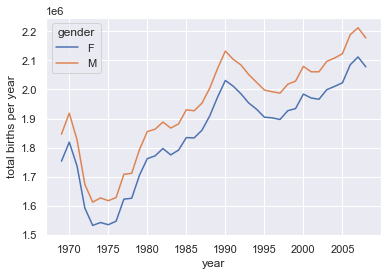

In [431]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [432]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

This final line is a robust estimate of the sample mean, where the 0.74 comes from the
interquartile range of a Gaussian distribution

In [433]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [434]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

We can combine the day, month, and year to create a Date index. This allows us to quickly compute the weekday
corresponding to each row

In [435]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

In [436]:
import matplotlib.pyplot as plt
import matplotlib as mpl

Plot the average number of births over day of week and decade

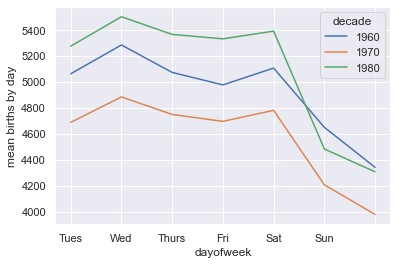

In [437]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [438]:
births_by_date = births.pivot_table('births', index=[births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [439]:
from datetime import datetime

In [440]:
births_by_date.index = [datetime(2012, month, day) for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


Plot the average number of births by date of the year

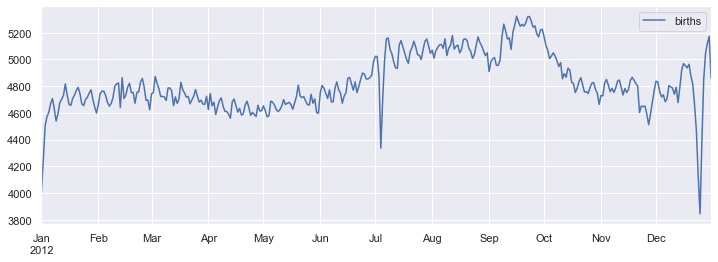

In [441]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

In particular, the striking feature of this graph is the dip in birthrate on US holidays
(e.g., Independence Day, Labor Day, Thanksgiving, Christmas, New Year’s Day)
although this likely reflects trends in scheduled/induced births rather than some deep
psychosomatic effect on natural births.